In [1]:
import pandas as pd 

# import 'numpy' 
import numpy as np

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
#import scikit_posthocs

In [24]:
df1=pd.read_csv('fifa_stats.csv')
df1

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,R. BorrÃ©,22,Colombia,75,82,River Plate,Right,1,3,4,High/ Medium,RS,19,5.750000,157
1996,E. ZukanoviÄ‡,31,Bosnia Herzegovina,75,75,Genoa,Left,2,3,2,Low/ High,CB,87,6.250000,187
1997,A. Elis,22,Honduras,75,82,Houston Dynamo,Right,1,4,4,High/ Medium,RM,17,5.083333,170
1998,M. FernÃ¡ndez,32,Chile,75,75,Club Necaxa,Right,2,4,5,Medium/ Medium,LDM,14,5.083333,159


In [5]:
df1.columns

Index(['Name', 'Age', 'Nationality', 'Overall_rating', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Height',
       'Weight'],
      dtype='object')

In [6]:
df1.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [22]:
df2=df1['Age']
population1= np.array(df2)
population1.sort()
population1

array([17, 18, 18, ..., 40, 40, 41], dtype=int64)

In [28]:
sample=random.choices(population=population1,k=200)
sample

[23,
 32,
 30,
 26,
 31,
 26,
 27,
 35,
 29,
 30,
 28,
 27,
 23,
 26,
 29,
 32,
 26,
 22,
 24,
 24,
 31,
 25,
 29,
 28,
 29,
 32,
 31,
 30,
 21,
 22,
 29,
 26,
 24,
 23,
 32,
 24,
 21,
 36,
 26,
 22,
 28,
 26,
 24,
 27,
 32,
 34,
 28,
 25,
 27,
 27,
 25,
 27,
 33,
 25,
 27,
 26,
 31,
 31,
 22,
 34,
 22,
 24,
 31,
 31,
 33,
 33,
 29,
 35,
 26,
 31,
 31,
 21,
 22,
 30,
 28,
 27,
 30,
 32,
 27,
 31,
 27,
 29,
 37,
 25,
 30,
 26,
 28,
 29,
 30,
 25,
 25,
 26,
 24,
 29,
 26,
 32,
 23,
 26,
 30,
 21,
 29,
 26,
 27,
 33,
 23,
 34,
 25,
 28,
 34,
 24,
 28,
 20,
 25,
 27,
 32,
 30,
 31,
 25,
 20,
 20,
 21,
 28,
 24,
 28,
 24,
 26,
 30,
 21,
 28,
 29,
 22,
 27,
 30,
 31,
 32,
 22,
 25,
 29,
 21,
 25,
 23,
 22,
 22,
 33,
 28,
 30,
 35,
 27,
 24,
 30,
 31,
 25,
 22,
 32,
 30,
 25,
 27,
 22,
 21,
 31,
 20,
 30,
 27,
 24,
 26,
 31,
 29,
 20,
 32,
 32,
 22,
 25,
 23,
 31,
 27,
 19,
 25,
 27,
 22,
 25,
 24,
 26,
 24,
 24,
 32,
 27,
 31,
 28,
 24,
 23,
 32,
 32,
 28,
 30,
 29,
 27,
 25,
 26,
 27,
 26]

In [27]:
import random

In [30]:
x_bar=np.mean(sample)
x_bar

27.19

In [31]:
s=np.std(sample)
s

3.8162678103089145

In [32]:
mu=np.mean(population1)
mu

27.2315

In [33]:
sigma=np.std(population1)
sigma

3.858096389412789

In [34]:
samplingerror= mu-x_bar
samplingerror

0.041499999999999204

In [35]:
standard_error=(x_bar-mu)/sigma/200.005
standard_error

-5.378165594801572e-05

In [36]:
df1.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


<AxesSubplot:ylabel='Density'>

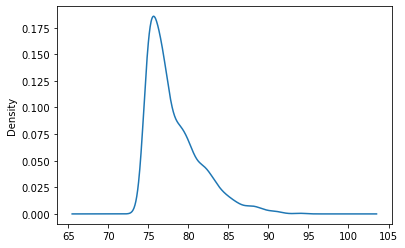

In [38]:
df1['Overall_rating'].plot(kind='kde')

In [ ]:
#it is right skewed.

In [39]:
df1.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [41]:
t_stat,p_val=stats.ttest_1samp(df1.Overall_rating,popmean=80)
print(t_stat,p_val)

-24.538460498672062 1.885376780327322e-116


In [ ]:
#h0 mu1=80
#h1 mu1!-80

In [ ]:
# we reject Ho so 

In [42]:
df1.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [46]:
Skill Moves.unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [45]:
df1.columns

Index(['Name', 'Age', 'Nationality', 'Overall_rating', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Height',
       'Weight'],
      dtype='object')

In [50]:
grp1=df1[(df1['Skill Moves']==1)]['Overall_rating']
grp2=df1[(df1['Skill Moves']==2)]['Overall_rating']
grp3=df1[(df1['Skill Moves']==3)]['Overall_rating']
grp4=df1[(df1['Skill Moves']==4)]['Overall_rating']
grp5=df1[(df1['Skill Moves']==5)]['Overall_rating']

In [ ]:
# h0 they all are independent
#h1 atleat 1 is not independent.

In [51]:
fstat,p_value=stats.f_oneway(grp1,grp2,grp3,grp4,grp5)
print(fstat,p_value)

31.085141826531746 3.8236370526660514e-25


In [ ]:
# p value is very low so we reject Ho now check which is not independent

In [54]:
comp=mc.MultiComparison(data=df1['Overall_rating'],groups=df1['Skill Moves'])
post_hoc = comp.tukeyhsd()
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.7143,0.0799,-1.4782,0.0496,False
1,3,-1.1876,0.001,-1.8826,-0.4926,True
1,4,0.0901,0.9,-0.6385,0.8187,False
1,5,3.4937,0.001,1.9646,5.0227,True
2,3,-0.4733,0.1091,-1.0061,0.0595,False
2,4,0.8044,0.0013,0.2284,1.3804,True
2,5,4.208,0.001,2.7455,5.6705,True
3,4,1.2777,0.001,0.7968,1.7586,True
3,5,4.6813,0.001,3.2536,6.1089,True
4,5,3.4036,0.001,1.9592,4.8479,True


In [56]:
df3=pd.read_csv('phone.csv')
df3

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...
815,10-03-15 6:58,185.328156,data,2015-03,data,data
816,11-03-15 6:58,89.819383,data,2015-03,data,data
817,12-03-15 6:58,117.604998,data,2015-03,data,data
818,13-03-15 0:39,77.834006,sms,2015-03,Vodafone,mobile


In [59]:
mean=np.mean(df3['duration'])
s_d=np.std(df3['duration'])
n=820
lower,upper=stats.norm.interval(0.95,loc=mean,scale=s_d/n**5)
print(lower,upper)
lower,upper=stats.norm.interval(0.99,loc=mean,scale=s_d/n**5)
print(lower,upper)

144.30493555983523 144.30493555983568
144.30493555983514 144.30493555983577


In [64]:
p=np.array(df3['network'].value_counts())

Vodafone     215
Three        215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [65]:
stats.shapiro(df3['network'])

ValueError: could not convert string to float: 'Meteor'

In [68]:
grp1=df3[(df3['network']=='Vodafone')]['duration']
grp2=df3[(df3['network']=='Three')]['duration']
grp3=df3[(df3['network']=='data')]['duration']
grp4=df3[(df3['network']=='Meteor')]['duration']
grp5=df3[(df3['network']=='Tesco')]['duration']
grp6=df3[(df3['network']=='landline')]['duration']
grp7=df3[(df3['network']=='voicemail')]['duration']


In [69]:
stats.levene(grp1,grp2,grp3,grp4,grp5,grp6,grp7)

LeveneResult(statistic=1.529736398828682, pvalue=0.1653481809327658)

In [ ]:
#h0 all are independt
#h1 atleat one is not independent.

In [71]:
f_stat,p_vlue=stats.f_oneway(grp1,grp2,grp3,grp4,grp5,grp6,grp7)
print(f_stat,p_vlue)

1.4036497792001215 0.2102939953009413


In [ ]:
df4=pd.crosstab(df3['network'],df3['duration']).plot(kind='bar')
df4

In [74]:
df3.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [75]:
df5=pd.crosstab(df3['network'],df3['network_type'])
df5

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [76]:
t_stat,p_val,dof,expected_val=chi2_contingency(observed=df5,correction=5)
print(t_stat,p_val,dof)

2460.0 0.0 18


In [ ]:
import statsmodel.api as sm
import statsmodel.api as sm
import statsmodel.api as sm
import statsmodel.api as sm

In [ ]:
from scipy import stats
from scipy import stats
from scipy import stats
from scipy import stats
from scipy import stats
from scipy import stats